In [2]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

!pwd

/home/s26549/sharedfolder/ewd/05lab


In [3]:
!cat zadaniaNaCwicz-plotting.txt

Zadania na cw5

wgrac dane census
wykres pudełkowy np. wieku + tytul
wykres kołowy
histogram np wieku + histogram po
    1) min-max
    2) sigmoid na tym samym wykresie (+ przezroczystosc)
        DO TEGO WROCIC???
wykres slupkowy zwykly, poziomy, "stacked"
wykres slupkowy 2 zmiennych (uzyc groupby)

wykres rozrzutu 2D (np. danych iris)
wykres liniowy (np. funkcji sigmoidalnej, albo rozkladu
normalnego)

rysunek wielokrotny (np. rozne 2 histogramy na jednym)

In [4]:
censusdf = pd.read_csv('./censusData-curated')
censusdf.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country decision  
0          2174             0              40  United-States    <=50K  
1             0             0              13  United-States    <=50K  
2             0             0              40  United-States    <=50K  
3             0             0              40  United-States    <=50K  
4             0             0              40           Cuba    <=50K

In [5]:
age_col = censusdf['age']
fig = px.box(age_col)
fig.show()

<AxesSubplot:ylabel='age'>

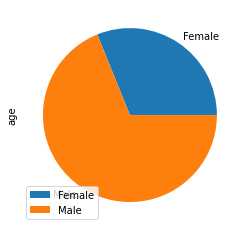

In [6]:
censusdf.groupby(['sex']).sum().plot(kind='pie', y='age')

In [7]:
fig = px.histogram(age_col)
fig.show()

In [8]:
scaler = StandardScaler()
censusdf['age_zscore'] = scaler.fit_transform(censusdf[['age']])
censusdf.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country decision  \
0          2174             0              40  United-States    <=50K   
1             0             0              13  United-States    <=50K   
2             0             0              40  United-States    <=50K   
3             0             0              40  United-States    <=50K   
4             0             0              40           Cuba    <=50K   

   age_zscore  
0    0.042824  
1    0.880292  
2   -0.033309  
3    1.108693  
4   -0.794644

In [9]:
fig = px.histogram(censusdf['age_zscore'])
fig.show()

In [10]:
scaler = MinMaxScaler()
censusdf['age_minmax'] = scaler.fit_transform(censusdf[['age']])
censusdf.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country decision  \
0          2174             0              40  United-States    <=50K   
1             0             0              13  United-States    <=50K   
2             0             0              40  United-States    <=50K   
3             0             0              40  United-States    <=50K   
4             0             0              40           Cuba    <=50K   

   age_zscore  age_minmax  
0    0.042824    0.301370  
1    0.880292    0.452055  
2   -0.033309    0.287671  
3    1.108693    0.493151  
4   -0.794644    0.150685

In [11]:
fig = px.histogram(censusdf['age_minmax'])
fig.show()

In [12]:
# TODO dodac przezroczystosc
z = 1 / (1 + np.exp(-censusdf['age_minmax']))
fig = px.line(pd.DataFrame(data=z, columns=['sigmoid']), 'sigmoid')
# fig.add_histogram(x=censusdf['age_minmax'])
fig.show()

In [13]:
censusdf_sex = censusdf.groupby('sex')['sex'].count()
fig = px.bar(censusdf_sex)
fig.show()

In [14]:
fig = px.bar(censusdf_sex, orientation='h')
fig.show()

In [15]:
censusdf.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'decision', 'age_zscore', 'age_minmax'],
      dtype='object')

In [16]:
census_age_workclass = censusdf.groupby(['workclass', 'sex'])['workclass', 'sex'].size().unstack()
fig = px.bar(census_age_workclass)
fig.show()

/tmp/ipykernel_47452/1889650009.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [17]:
fig = px.scatter(
    censusdf['age'].unique(),
    labels={'index':'count', 'x':'age'},
    x=censusdf['age'].unique()
)
fig.show()

In [18]:
censusdf['age'].unique().max(), censusdf[censusdf['age'] == 90].count()

(90,
 age               35
 workclass         35
 fnlwgt            35
 education         35
 education-num     35
 marital-status    35
 occupation        35
 relationship      35
 race              35
 sex               35
 capital-gain      35
 capital-loss      35
 hours-per-week    35
 native-country    35
 decision          35
 age_zscore        35
 age_minmax        35
 dtype: int64)